<a href="https://colab.research.google.com/github/jmParkGit/Colab/blob/main/Sparta_deepLearningWithImage/week2/week2_%EC%9C%A0%EB%AA%85%ED%99%94%EA%B0%80%ED%99%94%ED%92%8D%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 유명 화가의 화풍을 따라하는 인공지능 만들기

## 이미지 불러오기

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

net = cv2.dnn.readNetFromTorch('models/instance_norm/mosaic.t7')

img = cv2.imread('imgs/02.jpg')##input이미지

## 전처리

In [2]:
##전처리
h, w, c = img.shape

img = cv2.resize(img, dsize=(500, int(h / w * 500)))
print('img.shape')
print(img.shape)

img=img[162:513,185:428]

MEAN_VALUE = [103.939, 116.779, 123.680]
blob = cv2.dnn.blobFromImage(img, mean=MEAN_VALUE)

print('blob.shape')
print(blob.shape)

img.shape
(666, 500, 3)
blob.shape
(1, 3, 351, 243)


## 추론(forward) 결과 보기

output


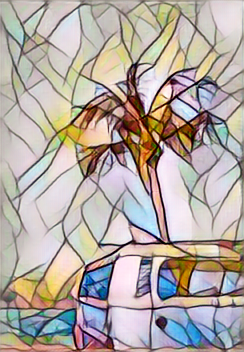

img


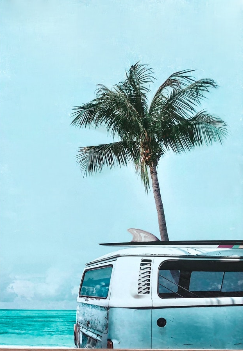

In [3]:
net.setInput(blob)
output=net.forward()

output = output.squeeze().transpose((1, 2, 0))
output += MEAN_VALUE

output = np.clip(output, 0, 255)
output = output.astype('uint8')

print('output')
cv2_imshow(output)
print('img')
cv2_imshow(img)